<ipython-input-66-a98accbefebb>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M':1, 'F':2})
<ipython-input-66-a98accbefebb>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'LOW':1, 'NORMAL':0, 'HIGH':2})
<ipython-input-66-a98accbefebb>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_op

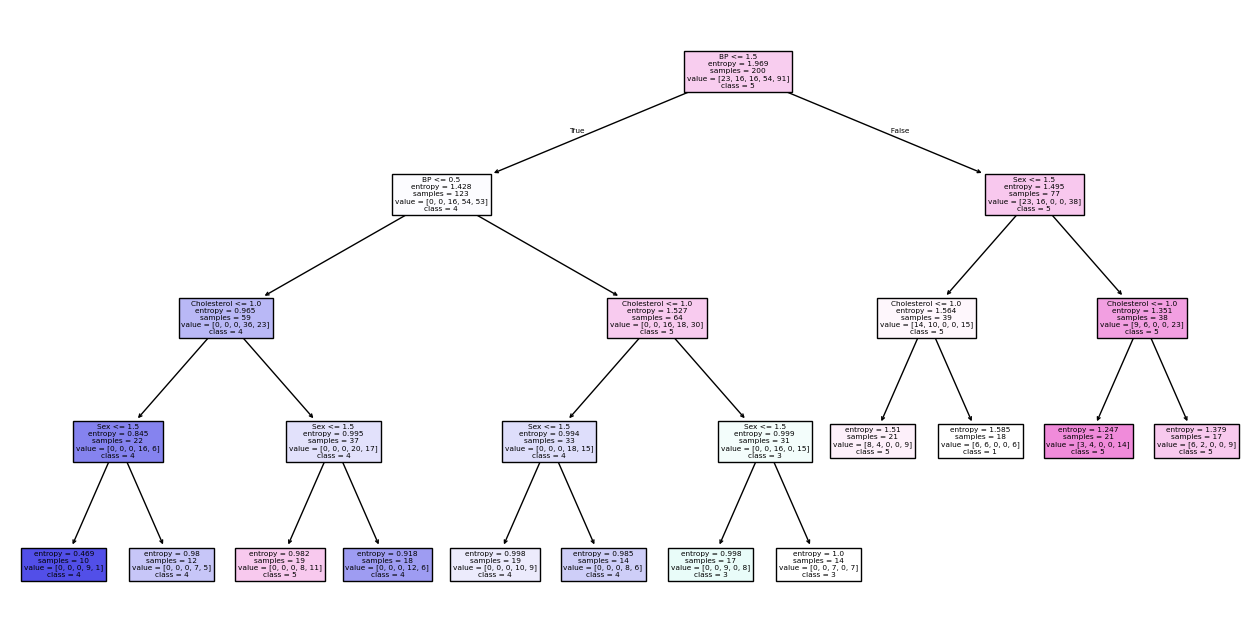

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/머신러닝/5.30/drug200.csv')
df['Sex'] = df['Sex'].replace({'M':1, 'F':2})
df['BP'] = df['BP'].replace({'LOW':1, 'NORMAL':0, 'HIGH':2})
df['Cholesterol'] = df['Cholesterol'].replace({'LOW' : 1, 'NORMAL':0, 'HIGH':2})
df['Drug'] = df['Drug'].replace({'drugA':1, 'drugB':2, 'drugC':3, 'drugX':4, 'drugY':5})
df.head()

X = df.iloc[:,1:4]
y = df.iloc[:,5]

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=0)
clf.fit(X,y)

# Decision Tree for binary classifier
plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Sex', 'BP', 'Cholesterol'], class_names=[str(c) for c in clf.classes_], filled=True)
plt.show()